<a href="https://colab.research.google.com/github/wisrovi/Hospital-smart-bracelet/blob/master/EcuacionesDistanciaV1.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INICIAR LIBRERIAS SYMPY

In [1]:
from sympy import Symbol
from sympy import solve, sqrt, simplify
from sympy import init_printing, srepr


init_printing()

In [2]:
def CalcularDistanciaDosPuntos(x1,x2,y1,y2):
  return sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

def CalcularArea(a, b, c):
  s = (a + b + c) / 2
  contenidoRaiz = s * (s - a) * (s - b) * (s - c)
  contenidoRaiz = abs(contenidoRaiz)
  area = sqrt(contenidoRaiz)
  return area

def DefinirEcuacion1(x1,x2,y1,y2, area):
  global x
  global y
  return (-((x1 * y2 - x2 * y1) + y * (x2 - x1) + x * (y1 - y2)) / 2) - area

def DefinirEcuacion2(x1,x2,y1,y2, a, b):
  global x
  global y
  return (x * (2 * x1 - 2 * x2) + y * (2 * y1 - 2 * y2) + (x2 ** 2 - x1 ** 2 - a ** 2 + b ** 2 + y2 ** 2 - y1 ** 2))

def SolucionarEcuaciones(ecua1, ecua2):
  rta = solve((ecua1, ecua2), dict=True)[0]
  valorx = round(rta[x], 1)
  valory = round(rta[y], 1)
  if valorx >= 0 and valory >= 0:
    return valorx, valory
  else:
    if valorx >= -0.5 and valory >= -0.5:
        return abs(valorx), abs(valory)
    return None, None

def hallarCoordenada(punto_clave1, punto_clave2):
    puntoA = punto_clave1[0]
    puntoB = punto_clave2[0]

    x1, y1 = puntoA[0], puntoA[1]
    x2, y2 = puntoB[0], puntoB[1]
    
    b = punto_clave1[1]
    a = punto_clave2[1]    

    # hallo la distancia entre los dos puntos conocidos    
    c = CalcularDistanciaDosPuntos(x1,x2,y1,y2)

    # hallo el area del triangulo que forman los tres vectores
    area = CalcularArea(a,b,c)

    # defino la ecuacion de la formula del area con el metodo de determinantes
    ecua1 = DefinirEcuacion1(x1,x2,y1,y2, area)

    # con las ecuaciones de distancia hallo una segunda ecuación
    ecua2 = DefinirEcuacion2(x1,x2,y1,y2, a, b)

    return ecua1, ecua2

SOLUCION EJEMPLO

In [6]:
puntoA = (2, 12)
distancia_al_puntoA = 0.4

puntoB = (10, 10)
distancia_al_puntoB = 1.12

puntoC = (2, 2)
distancia_al_puntoC = 3.55

print("A y B:")
punto_clave1 = puntoA, distancia_al_puntoA
punto_clave2 = puntoB, distancia_al_puntoB

ecua1, ecua2 = hallarCoordenada(punto_clave1, punto_clave2)
# hallo los puntos del vertice donde apuntan los dos vectores de los vertices fijos
valorx, valory = SolucionarEcuaciones(ecua1, ecua2)
print(valorx, valory)

print("A y C:")
punto_clave1 = puntoA, distancia_al_puntoA
punto_clave2 = puntoC, distancia_al_puntoC
ecua1, ecua2 = hallarCoordenada(punto_clave1, punto_clave2)
# hallo los puntos del vertice donde apuntan los dos vectores de los vertices fijos
valorx, valory = SolucionarEcuaciones(ecua1, ecua2)
print(valorx, valory)

print("B y C:")
punto_clave1 = puntoB, distancia_al_puntoB
punto_clave2 = puntoC, distancia_al_puntoC
ecua1, ecua2 = hallarCoordenada(punto_clave1, punto_clave2)
# hallo los puntos del vertice donde apuntan los dos vectores de los vertices fijos
valorx, valory = SolucionarEcuaciones(ecua1, ecua2)
print(valorx, valory)

A y B:
5.0 7.1
A y C:
None None
B y C:
2.8 9.9


ECUACIONES USADAS

In [3]:
usarValoresReales = False

A y B:


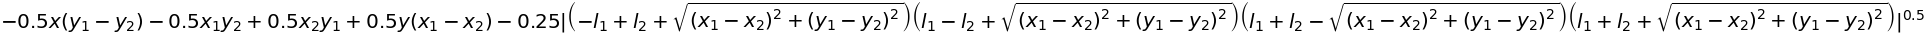

In [4]:
punto_clave1 = None
punto_clave2 = None

x = Symbol("x")
y = Symbol("y")

if usarValoresReales:
  x_p1 = 2
  y_p1 = 12
  l_p1 = 0.4

  x_p2 = 10
  y_p2 = 10
  l_p2 = 1.12  
else:
  x_p1 = Symbol("x1")
  y_p1 = Symbol("y1")
  l_p1 = Symbol("l1")

  x_p2 = Symbol("x2")
  y_p2 = Symbol("y2")
  l_p2 = Symbol("l2")

print("A y B:")
punto_clave1 = (x_p1, y_p1), l_p1
punto_clave2 = (x_p2, y_p2), l_p2

ecua1, ecua2 = hallarCoordenada(punto_clave1, punto_clave2)
simplify(ecua1).evalf()

In [5]:
simplify(ecua2).evalf()

In [6]:
from sympy import Symbol
from sympy.printing.latex import LatexPrinter, print_latex
from sympy.core.function import UndefinedFunction, Function


class MyLatexPrinter(LatexPrinter):
    """Print derivative of a function of symbols in a shorter form.
    """
    def _print_Derivative(self, expr):
        function, *vars = expr.args
        if not isinstance(type(function), UndefinedFunction) or \
           not all(isinstance(i, Symbol) for i in vars):
            return super()._print_Derivative(expr)

        # If you want the printer to work correctly for nested
        # expressions then use self._print() instead of str() or latex().
        # See the example of nested modulo below in the custom printing
        # method section.
        return "{}_{{{}}}".format(
            self._print(Symbol(function.func.__name__)),
                        ''.join(self._print(i) for i in vars))


def print_my_latex(expr):
    """ Most of the printers define their own wrappers for print().
    These wrappers usually take printer settings. Our printer does not have
    any settings.
    """
    print(MyLatexPrinter().doprint(expr))

from IPython.display import Image, display
from IPython.lib.latextools import latex_to_png

expr = simplify(ecua2).evalf()
print_latex(expr)
print_my_latex(expr)

l_{1}^{2} - l_{2}^{2} + 2.0 x \left(x_{1} - x_{2}\right) - x_{1}^{2} + x_{2}^{2} + 2.0 y \left(y_{1} - y_{2}\right) - y_{1}^{2} + y_{2}^{2}
l_{1}^{2} - l_{2}^{2} + 2.0 x \left(x_{1} - x_{2}\right) - x_{1}^{2} + x_{2}^{2} + 2.0 y \left(y_{1} - y_{2}\right) - y_{1}^{2} + y_{2}^{2}


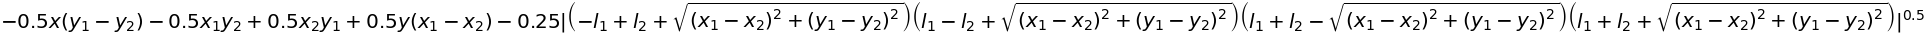

- 0.5 x \left(y_{1} - y_{2}\right) - 0.5 x_{1} y_{2} + 0.5 x_{2} y_{1} + 0.5 y \left(x_{1} - x_{2}\right) - 0.25 \left|{\left(- l_{1} + l_{2} + \sqrt{\left(x_{1} - x_{2}\right)^{2} + \left(y_{1} - y_{2}\right)^{2}}\right) \left(l_{1} - l_{2} + \sqrt{\left(x_{1} - x_{2}\right)^{2} + \left(y_{1} - y_{2}\right)^{2}}\right) \left(l_{1} + l_{2} - \sqrt{\left(x_{1} - x_{2}\right)^{2} + \left(y_{1} - y_{2}\right)^{2}}\right) \left(l_{1} + l_{2} + \sqrt{\left(x_{1} - x_{2}\right)^{2} + \left(y_{1} - y_{2}\right)^{2}}\right)}\right|^{0.5}


In [7]:
expr = simplify(ecua1).evalf()

eq = MyLatexPrinter().doprint(expr)
data = latex_to_png(eq, wrap=True)
display(Image(data=data))

print_my_latex(expr)

In [8]:
expr = simplify(ecua2).evalf()

eq = MyLatexPrinter().doprint(expr)
data = latex_to_png(eq, wrap=True)
display(Image(data=data))

print_my_latex(expr)

l_{1}^{2} - l_{2}^{2} + 2.0 x \left(x_{1} - x_{2}\right) - x_{1}^{2} + x_{2}^{2} + 2.0 y \left(y_{1} - y_{2}\right) - y_{1}^{2} + y_{2}^{2}


REPLICAR ECUACIONES

In [1]:
constanteX_ecuacion1 = -(y_p1/2 - y_p2/2)
constanteY_ecuacion1 = x_p1/2 - x_p2/2

raizDenominador = sqrt(  pow((x_p1-x_p2),2)  +  pow((y_p1-y_p2),2) )

denominador1 = -l_p1 + l_p2 + raizDenominador
denominador2 = l_p1 - l_p2 + raizDenominador
denominador3 = l_p1 + l_p2 - raizDenominador
denominador4 = l_p1 + l_p2 + raizDenominador

denominador = denominador1 * denominador2 * denominador3 * denominador4
denominador = abs(denominador)
denominador = sqrt(denominador)

constanteNumerica_ecuacion1 = (1/4) * denominador  + ((x_p1*y_p2)/2) - ((x_p2*y_p1)/2) 

print("Ecuacion 1 (Manual)")
ecuacion1 = x*(constanteX_ecuacion1) + (y)*(constanteY_ecuacion1) - constanteNumerica_ecuacion1
simplify(ecuacion1).evalf()

NameError: ignored

In [62]:
print("Ecuacion 2 (Manual)")
constanteX_ecuacion2 =  2*x_p1 -2*x_p2
constanteY_ecuacion2 = 2*y_p1 -2*y_p2
constanteNumerica_ecuacion2 = pow(l_p1, 2) - pow(l_p2, 2) - pow(x_p1, 2) + pow(x_p2, 2) - pow(y_p1, 2) + pow(y_p2, 2) 

ecuacion2 = x*(constanteX_ecuacion2) + y*(constanteY_ecuacion2)  + constanteNumerica_ecuacion2
simplify(ecuacion2).evalf()

Ecuacion 2 (Manual)


In [53]:
rta = solve((ecuacion1, ecuacion2), dict=True)[0]
print(rta)

{x: 4.95651218711058, y: 7.09964874844230}


MODO MANUAL


In [10]:
puntoB = (10, 10)
distancia_al_puntoB = 1.12

puntoA = (2, 12)
distancia_al_puntoA = 0.4

x_p1 = puntoA[0]
y_p1 = puntoA[1]
l_p1 = distancia_al_puntoA

x_p2 = puntoB[0]
y_p2 = puntoB[1]
l_p2 = distancia_al_puntoB

SOLUCION SISTEMA

In [65]:
rtaY = -(constanteX_ecuacion1*constanteNumerica_ecuacion2 + constanteX_ecuacion2*constanteNumerica_ecuacion1) / (constanteX_ecuacion1*constanteY_ecuacion2 - constanteX_ecuacion2*constanteY_ecuacion1)
simplify(rtaY).evalf()

In [67]:
rtaX = ( -constanteNumerica_ecuacion2 - constanteY_ecuacion2*rtaY ) / constanteX_ecuacion2
simplify(rtaX).evalf()

EVALUAR ECUACIONES

In [3]:
from math import sqrt
def CalcularPuntos(punto_clave1, punto_clave2):  
  x_p1 = punto_clave1[0][0]
  y_p1 = punto_clave1[0][1]
  l_p1 = punto_clave1[1]

  x_p2 = punto_clave2[0][0]
  y_p2 = punto_clave2[0][1]
  l_p2 = punto_clave2[1]


  ##################################################################################################################
  constanteX_ecuacion1 = -(y_p1/2 - y_p2/2)
  constanteY_ecuacion1 = x_p1/2 - x_p2/2
  raizDenominador = sqrt(  pow((x_p1-x_p2),2)  +  pow((y_p1-y_p2),2) )
  denominador1 = -l_p1 + l_p2 + raizDenominador
  denominador2 = l_p1 - l_p2 + raizDenominador
  denominador3 = l_p1 + l_p2 - raizDenominador
  denominador4 = l_p1 + l_p2 + raizDenominador
  denominador = denominador1 * denominador2 * denominador3 * denominador4
  denominador = abs(denominador)
  denominador = sqrt(denominador)
  constanteNumerica_ecuacion1 = (1/4) * denominador  + ((x_p1*y_p2)/2) - ((x_p2*y_p1)/2) 
  # print("Ecuacion 1 (Manual)")
  # La ecuacion 1 esta definida de la siguiente manera
  # ecuacion1 = x*(constanteX_ecuacion1) + (y)*(constanteY_ecuacion1) - constanteNumerica_ecuacion1




  ##################################################################################################################
  # print("Ecuacion 2 (Manual)")
  constanteX_ecuacion2 =  2*x_p1 -2*x_p2
  constanteY_ecuacion2 = 2*y_p1 -2*y_p2
  constanteNumerica_ecuacion2 = pow(l_p1, 2) - pow(l_p2, 2) - pow(x_p1, 2) + pow(x_p2, 2) - pow(y_p1, 2) + pow(y_p2, 2) 

  # La ecuacion 2 esta definida de la siguiente manera
  # ecuacion2 = x*(constanteX_ecuacion2) + y*(constanteY_ecuacion2)  + constanteNumerica_ecuacion2



  ##################################################################################################################
  rtaY = -(constanteX_ecuacion1*constanteNumerica_ecuacion2 + constanteX_ecuacion2*constanteNumerica_ecuacion1) / (constanteX_ecuacion1*constanteY_ecuacion2 - constanteX_ecuacion2*constanteY_ecuacion1)
  rtaY = round(rtaY, 1)

  rtaX = -(constanteNumerica_ecuacion1*constanteY_ecuacion2 + constanteNumerica_ecuacion2*constanteY_ecuacion1)/(constanteX_ecuacion2*constanteY_ecuacion1-constanteX_ecuacion1*constanteY_ecuacion2) 
  rtaX = round(rtaX, 1)
  return rtaX, rtaY

In [4]:
puntoA = (2, 12)
distancia_al_puntoA = 0.4

puntoB = (10, 10)
distancia_al_puntoB = 1.12

puntoC = (2, 2)
distancia_al_puntoC = 3.55

punto_clave1 = puntoA, distancia_al_puntoA
punto_clave2 = puntoB, distancia_al_puntoB
punto_clave3 = puntoC, distancia_al_puntoC

from time import time
for i in range(3):
  start_time = time()
  if i == 0:
    print( "A y B",   CalcularPuntos(punto_clave1, punto_clave2)  )

  if i == 1:
    print( "A y C",    CalcularPuntos(punto_clave1, punto_clave3)  )

  if i == 2:
    print( "B y C",    CalcularPuntos(punto_clave2, punto_clave3)  )
  elapsed_time = time() - start_time
  print("Elapsed time: %0.10f seconds." % elapsed_time)

A y B (5.0, 7.1)
Elapsed time: 0.0001299381 seconds.
A y C (-2.4, 7.6)
Elapsed time: 0.0000829697 seconds.
B y C (2.8, 9.9)
Elapsed time: 0.0000615120 seconds.
